In [27]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
import sys

from astropy.utils.data import get_pkg_data_filename

In [28]:
#load_wcs_from_file('../Data_CometHolmes/holmes-0004.wcs')
import cairo

a =!/Users/anahoban/software/astrometry/bin/wcsinfo ../Data_CometHolmes/holmes-0010.wcs


In [29]:
# Data
all_files = !ls ../Data_CometHolmes
jpeg_files = all_files[0::2] #to get only the jpeg files
#getting the image numbers

image_number = []
for i in jpeg_files:
    image_number.append(i[7:11])

In [30]:
#getting the exif
import PIL.Image
img = []
exif_data = []
n=0
for i in range(len(jpeg_files)):
    img.append(PIL.Image.open('../Data_CometHolmes/' + jpeg_files[i]))
    exif_data.append(img[i].getexif())

pic_date_time = []
# associate picture number with time 
for i in range(1299):
    pic_date_time.append([image_number[i], exif_data[i].get(306)])

#get only the ones with EXIF values
pdt_exif = [row for row in pic_date_time if row[1] != None ]

#some entries have the form: '2007:10:30 14:29:03\x00', so let's remove the weird ending
for i in range(len(pdt_exif)):
    if len(pdt_exif[i][1]) == 20:
        pdt_exif[i][1] = pdt_exif[i][1][:-1]

#discrepency between paper and code: we have 11 more timestamped images !!!!

In [31]:
# all the time stamped images with the timestamp
pdt_exif

[['0001', '2007:11:01 21:44:30'],
 ['0003', '2007:11:06 19:02:26'],
 ['0004', '2007:11:08 00:37:30'],
 ['0010', '2007:11:06 23:49:01'],
 ['0011', '2007:11:06 23:49:01'],
 ['0042', '2007:11:04 17:04:49'],
 ['0064', '2007:11:05 18:16:11'],
 ['0074', '2007:11:06 17:30:57'],
 ['0078', '2007:10:24 23:56:47'],
 ['0106', '2007:10:31 10:32:19'],
 ['0127', '2007:10:28 10:03:53'],
 ['0139', '2007:11:20 13:10:51'],
 ['0215', '2007:12:18 02:45:32'],
 ['0219', '2007:11:02 19:14:37'],
 ['0270', '2007:12:08 17:36:17'],
 ['0274', '2007:11:24 19:57:20'],
 ['0276', '2007:10:28 16:32:09'],
 ['0279', '2007:11:22 17:50:30'],
 ['0280', '2007:11:22 16:04:39'],
 ['0281', '2007:11:24 19:56:54'],
 ['0282', '2007:11:22 10:39:20'],
 ['0283', '2007:11:24 22:15:59'],
 ['0284', '2007:11:07 09:36:44'],
 ['0285', '2007:11:24 19:56:18'],
 ['0286', '2007:11:17 09:55:03'],
 ['0302', '2007:10:30 14:29:03'],
 ['0303', '2007:10:30 14:28:47'],
 ['0307', '2007:11:02 11:43:37'],
 ['0308', '2007:11:02 11:43:51'],
 ['0314', '200

## Date+time 

In [32]:
from datetime import datetime

d = pdt_exif[0][1]
print(d)

stamp = datetime(int(d[:4]),int(d[5:7]),int(d[8:10]),int(d[11:13]),int(d[14:16]),int(d[17:19]))

date_string = d
date = datetime.strptime(date_string, "%Y:%m:%d  %H:%M:%S")
timestamp = datetime.timestamp(date)
print(timestamp)

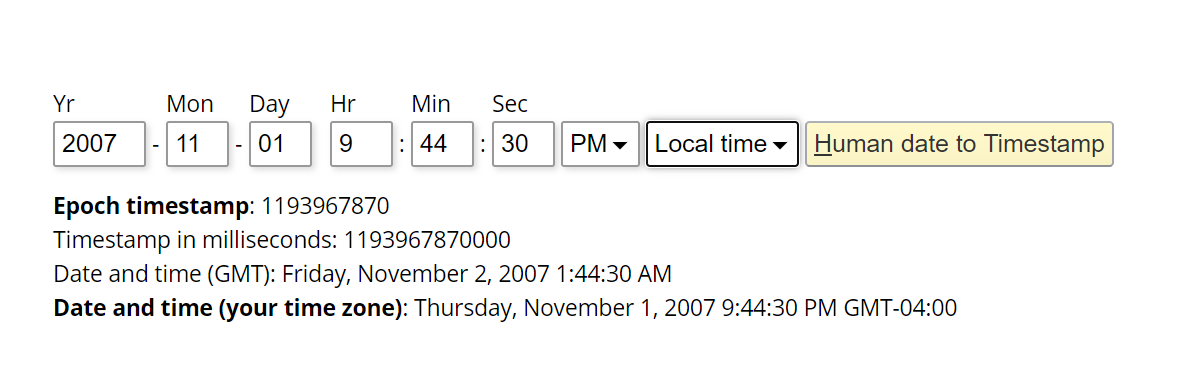


#transforming all datetimes into timestamps:
m= len(pdt_exif)
timestamps_only = []
pdt_stamps = pdt_exif
for i in range(m):
    date_time_string = pdt_exif[i][1]
    d = datetime.strptime(date_time_string, "%Y:%m:%d  %H:%M:%S")
    pdt_stamps[i][1] = datetime.timestamp(d)
    timestamps_only.append(datetime.timestamp(d))

In [33]:
from astropy.time import Time
#woups! we need JD date!!!
#we need the following format: '2010-01-01T00:00:00'

#getting the format
dates = np.transpose(pdt_exif)[1]
print(datetime.strptime(dates[1], "%Y:%m:%d  %H:%M:%S").strftime("%Y-%m-%dT%H:%M:%S"))

m = len(pdt_exif)
pdt_julian = pdt_exif

for i in range(m):
    date_time_string = pdt_exif[i][1]
    #right format
    d = datetime.strptime(date_time_string, "%Y:%m:%d  %H:%M:%S").strftime("%Y-%m-%dT%H:%M:%S")
    pdt_julian[i][1] = d
pdt_julian

2007-11-06T19:02:26


[['0001', '2007-11-01T21:44:30'],
 ['0003', '2007-11-06T19:02:26'],
 ['0004', '2007-11-08T00:37:30'],
 ['0010', '2007-11-06T23:49:01'],
 ['0011', '2007-11-06T23:49:01'],
 ['0042', '2007-11-04T17:04:49'],
 ['0064', '2007-11-05T18:16:11'],
 ['0074', '2007-11-06T17:30:57'],
 ['0078', '2007-10-24T23:56:47'],
 ['0106', '2007-10-31T10:32:19'],
 ['0127', '2007-10-28T10:03:53'],
 ['0139', '2007-11-20T13:10:51'],
 ['0215', '2007-12-18T02:45:32'],
 ['0219', '2007-11-02T19:14:37'],
 ['0270', '2007-12-08T17:36:17'],
 ['0274', '2007-11-24T19:57:20'],
 ['0276', '2007-10-28T16:32:09'],
 ['0279', '2007-11-22T17:50:30'],
 ['0280', '2007-11-22T16:04:39'],
 ['0281', '2007-11-24T19:56:54'],
 ['0282', '2007-11-22T10:39:20'],
 ['0283', '2007-11-24T22:15:59'],
 ['0284', '2007-11-07T09:36:44'],
 ['0285', '2007-11-24T19:56:18'],
 ['0286', '2007-11-17T09:55:03'],
 ['0302', '2007-10-30T14:29:03'],
 ['0303', '2007-10-30T14:28:47'],
 ['0307', '2007-11-02T11:43:37'],
 ['0308', '2007-11-02T11:43:51'],
 ['0314', '200

In [34]:
#get julian times
times = np.transpose(pdt_julian)[1]
t = Time(times, format='isot', scale='utc').jd

#julian times:
np.min(t)

2452820.075324074

## Constructing the time prior

In [9]:
def date2julian(date_string):
    date = datetime.strptime(date_string, "%Y:%m:%d  %H:%M:%S").strftime("%Y-%m-%dT%H:%M:%S")
    julian = Time(date, format='isot', scale='utc').jd
    return julian

t_min = date2julian("2007:07:02  00:00:00") #july 1st 2007
t_max = date2julian("2008:05:01  00:00:00") #may 1st 2008
print(t_min, t_max)


2454283.5 2454587.5


delta time: 304.0 , # bins: 38 38.0


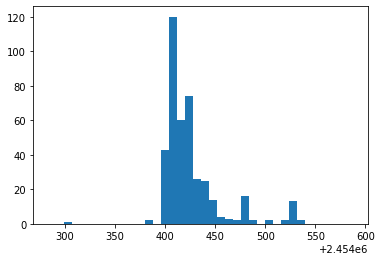

In [10]:
delta_t = t_max-t_min
bins_width = 8.0 #number of days in JD is just the number of days
bins_num = int(delta_t/bins_width) #integer

print('delta time:', delta_t, ', # bins:', bins_num,delta_t/bins_width)

#keep only times between t_min and t_max
#times_filtered = [i for i in t if not  i <= t_min and i <= t_max] 
hist_array, hist_bins, hist_patches = plt.hist(t, bins = bins_num, range = (t_min, t_max));


In [11]:
extra_counts = np.linspace(t_min + 4.0, t_max + 4.0, 39)

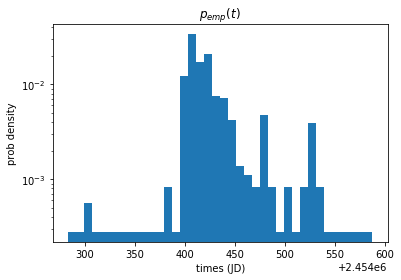

In [12]:
plt.title('$p_{emp}(t)$')
plt.xlabel('times (JD)')
plt.ylabel('prob density')
plt.semilogy()
prob_time, bins_norm, patches_norm = plt.hist(np.concatenate((t, extra_counts)), bins = bins_num, range = (t_min, t_max), density = True)


In [13]:
#this is p_emp
print(prob_time)
print(bins_norm)

[0.0002784  0.0002784  0.00055679 0.0002784  0.0002784  0.0002784
 0.0002784  0.0002784  0.0002784  0.0002784  0.0002784  0.0002784
 0.00083519 0.0002784  0.01224944 0.03368597 0.01698218 0.02087973
 0.0075167  0.00723831 0.00417595 0.00139198 0.00111359 0.00083519
 0.00473274 0.00083519 0.0002784  0.00083519 0.0002784  0.00083519
 0.00389755 0.00083519 0.0002784  0.0002784  0.0002784  0.0002784
 0.0002784  0.0002784 ]
[2454283.5 2454291.5 2454299.5 2454307.5 2454315.5 2454323.5 2454331.5
 2454339.5 2454347.5 2454355.5 2454363.5 2454371.5 2454379.5 2454387.5
 2454395.5 2454403.5 2454411.5 2454419.5 2454427.5 2454435.5 2454443.5
 2454451.5 2454459.5 2454467.5 2454475.5 2454483.5 2454491.5 2454499.5
 2454507.5 2454515.5 2454523.5 2454531.5 2454539.5 2454547.5 2454555.5
 2454563.5 2454571.5 2454579.5 2454587.5]


## Time prior

In [14]:
def p_emp(time):
    '''Takes time and returns probability of getting that time based on time hist'''
    if bins_norm[0] > time or time > bins_norm[len(bins_norm)-1]:
            return 'Given date is not between July 1st 2007 and May 1st 2008.'
    else:
            for i in range(len(bins_norm)-1):
                if bins_norm[i] <= time and time <= bins_norm[i+1]:
                    return prob_time[i]  

pdt_transpose = np.transpose(pdt_julian)
dates_list = pdt_transpose[0].tolist() #to get index we need a list

def t_prior(number, time, p_exif):
    '''Takes an image and checks whether or not it has a EXIF and gives prior depending on that
       time can be an array'''
    #if it has EXIF date:
    if number in np.transpose(pdt_exif):
        #get its EXIF date:
        index = dates_list.index(number)
        
        #date in JD:
        exif_date = Time(pdt_transpose[1][index], format='isot', scale='utc').jd
        
        prob = []
        for t in time:
            prob.append(p_exif * uniform_t(exif_date, t) + (1-p_exif)*p_emp(t))
        return prob
        
        
    #if it doesn't have an EXIF date
    else:
        prob = []
        for t in time:
            prob.append(p_emp(t))
        return prob
    
def uniform_t(t_exif, time):
    '''uniform distribution of t_i w.r.t t_exif +- 0.5 days. All times and in JD'''
    if t_exif - 0.5 <= time and time <= t_exif + 0.5:
        return 1 
    else:
        return 0
    
    

In [15]:
from poliastro.examples import molniya
import poliastro.plotting.misc

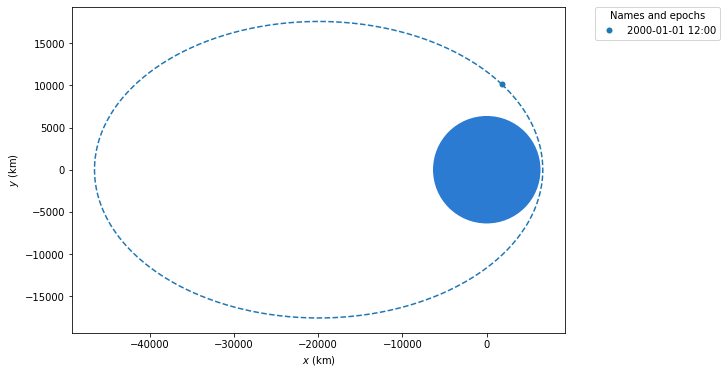

In [16]:
molniya.plot()

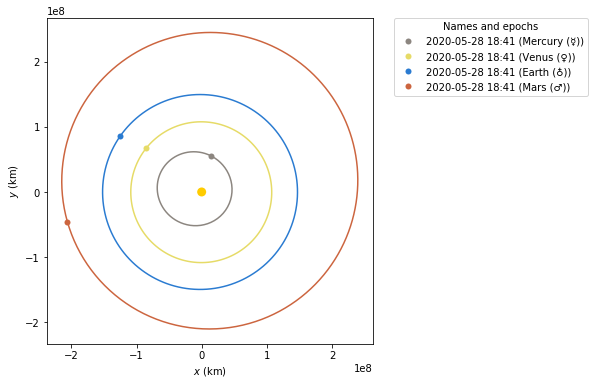

In [25]:
poliastro.plotting.misc.plot_solar_system(outer=False, epoch=None, use_3d=False, interactive=False)

AttributeError: 'str' object has no attribute 'name'

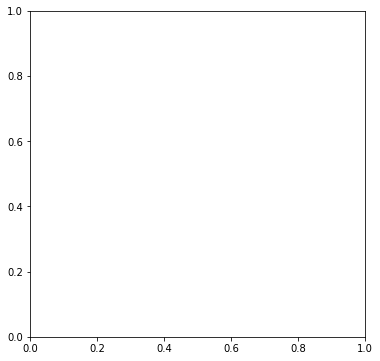

In [26]:
poliastro.bodies.SolarSystemPlanet.plot('Earth')